In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/maxattard/Downloads/Topic_Survey_Assignment.csv')
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [3]:
df = df.rename(columns={"Unnamed: 0":"da", "Very interested":"very", "Somewhat interested":"somewhat", "Not interested":"not"})
df.set_index('da', inplace = True)
df

,very,somewhat,not
da,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [4]:
df.sort_values(['very'], ascending = False, axis = 0, inplace = True)
df

,very,somewhat,not
da,,,
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [5]:
df['very_per'] = df['very']/2233
df['very_per'] = df['very_per']*100
df['somewhat_per'] = df['somewhat']/2233
df['somewhat_per'] = df['somewhat_per']*100
df['not_per'] = df['not']/2233
df['not_per'] = df['not_per']*100
df

,very,somewhat,not,very_per,somewhat_per,not_per
da,,,,,,
Data Analysis / Statistics,1688,444,60,75.593372,19.883565,2.686968
Machine Learning,1629,477,74,72.951187,21.361397,3.313927
Data Visualization,1340,734,102,60.008957,32.870578,4.567846
Big Data (Spark / Hadoop),1332,729,127,59.650694,32.646664,5.687416
Deep Learning,1263,770,136,56.560681,34.482759,6.090461
Data Journalism,429,1081,610,19.211823,48.410210,27.317510


In [6]:
df['very_per'] = df['very_per'].round(2)
df['somewhat_per'] = df['somewhat_per'].round(decimals = 2)
df['not_per'] = df['not_per'].round(decimals = 2)
df

,very,somewhat,not,very_per,somewhat_per,not_per
da,,,,,,
Data Analysis / Statistics,1688,444,60,75.59,19.88,2.69
Machine Learning,1629,477,74,72.95,21.36,3.31
Data Visualization,1340,734,102,60.01,32.87,4.57
Big Data (Spark / Hadoop),1332,729,127,59.65,32.65,5.69
Deep Learning,1263,770,136,56.56,34.48,6.09
Data Journalism,429,1081,610,19.21,48.41,27.32


In [7]:
df_per = df[['very_per', 'somewhat_per', 'not_per']]
df_per

,very_per,somewhat_per,not_per
da,,,
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


In [8]:
df_hun = df_per / 100
#df_hun['very_per'] = df['very_per']*100
#df_hun['somewhat_per'] = df['somewhat_per']*100
#df_hun['not_per'] = df['not_per']*100
df_hun = df_hun.rename(columns={"very_per":"Very interested", "somewhat_per":"Somewhat interested", "not_per":"Not interested"})
df_hun

,Very interested,Somewhat interested,Not interested
da,,,
Data Analysis / Statistics,0.7559,0.1988,0.0269
Machine Learning,0.7295,0.2136,0.0331
Data Visualization,0.6001,0.3287,0.0457
Big Data (Spark / Hadoop),0.5965,0.3265,0.0569
Deep Learning,0.5656,0.3448,0.0609
Data Journalism,0.1921,0.4841,0.2732


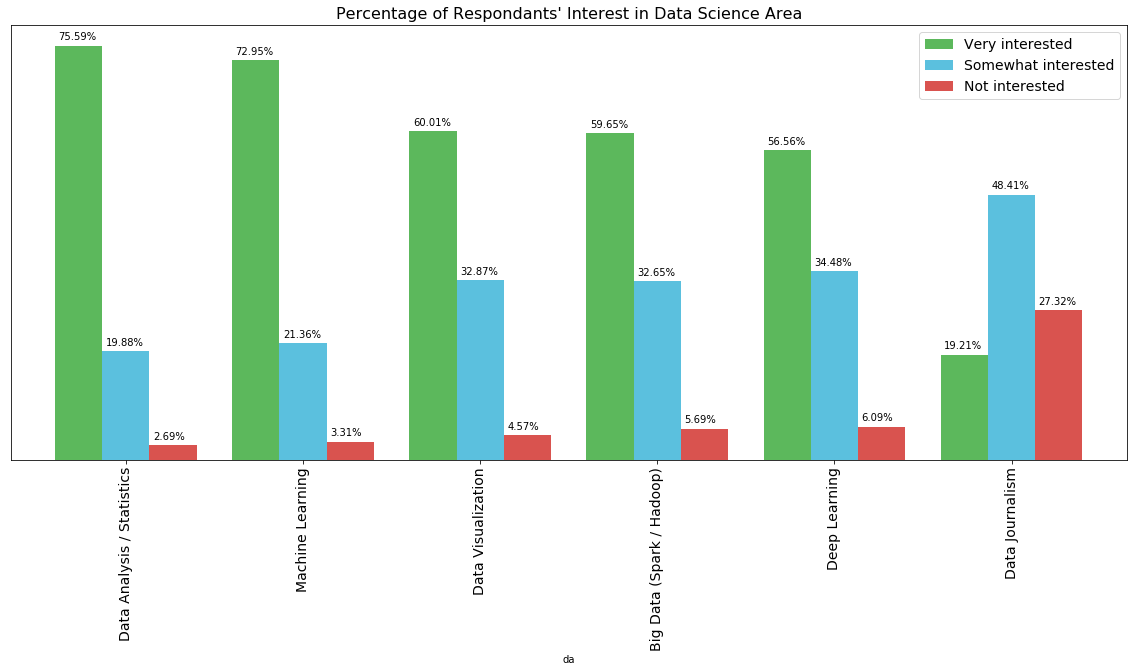

In [9]:
ax = df_hun.plot(kind='bar',
                 figsize=(20,8),
                 width=0.8,
                 color=["#5cb85c", "#5bc0de", "#d9534f"],
                 fontsize=14,
                )
ax.set_title('Percentage of Respondants\' Interest in Data Science Area', size=16)
ax.set_xticklabels(df_hun.index, rotation=90)
ax.legend(fontsize = 14)

for p in ax.patches:
    ax.annotate("{:.2%}".format(p.get_height()),
                xy=(p.get_x()+0.02, p.get_height()+0.01))
    
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

plt.show()